# Task 12 - CNN - part 1
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2

from numpy_nn import *
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

In [2]:
# param for visualisation
n_data = 1001
n_data_bw = 7


# A) Individual Layers

## Fully-Connected (Linear) layer

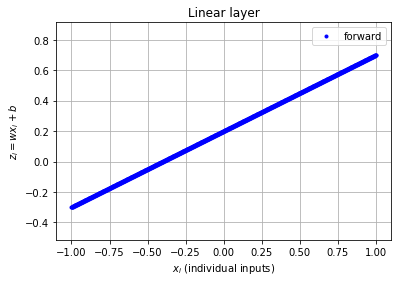

In [3]:
# set layer params
input_dim = 1
output_dim = 1

# create instance of linear layer
linear_layer = Linear(input_dim, output_dim)

# set (pre-trained) weights and bias of linear layer (for demonstration)
linear_layer.W = np.array(0.5).reshape(input_dim, output_dim)
linear_layer.b = np.array(0.2).reshape(1, output_dim)

# set data 
batch_size = n_data
x = np.linspace(-1, 1, batch_size * input_dim).reshape(batch_size, input_dim)

# forward pass of linear layer
forward_output = linear_layer.forward(x)

# visualize results 
visualize_xy([(x, forward_output)], ['forward'], title='Linear layer', xlabel='$x_i$ (individual inputs)', ylabel='$z_i = wx_i + b$', axis='equal', grid=True, linestyle='b.', save_filepath='layer_linear_forward.png')

In [4]:
# set layer params
input_dim = 3
output_dim = 2

# create instance of linear layer
linear_layer = Linear(input_dim, output_dim)

# set (pre-trained) weights and bias of linear layer (for demonstration)
linear_layer.W = np.linspace(1, -1, input_dim * output_dim).reshape(input_dim, output_dim)
linear_layer.b = np.linspace(-0.5, 0.5, output_dim).reshape(1, output_dim)

# set data 
batch_size = 2
x = np.linspace(-2, 2, batch_size * input_dim).reshape(batch_size, input_dim)

# forward pass of linear layer
forward_output = linear_layer.forward(x)

For the prepared params and data, output should be:<br>
```
Forward pass of your linear layer:
[[-2.5  -0.06]
 [-1.06 -1.5 ]]
```

In [5]:
# printing results
print(f'Forward pass of your linear layer:\n{forward_output}\n')

Forward pass of your linear layer:
[[-2.5  -0.06]
 [-1.06 -1.5 ]]



In [6]:
# set gradient of loss wrt layer output
dL_wrt_output = np.linspace(1,2,output_dim * batch_size).reshape(batch_size, output_dim)

# backward pass of linear layer (computation of gradient of loss wrt layer input)
dL_wrt_x = linear_layer.backward(dL_wrt_output)

For the prepared params and data, output should be:<br>
```
Backward pass of your linear layer:
[[1.         1.33333333]
 [1.66666667 2.        ]]

Weights gradients:
[[[-2.         -2.66666667]
  [-1.2        -1.6       ]
  [-0.4        -0.53333333]]

 [[ 0.66666667  0.8       ]
  [ 2.          2.4       ]
  [ 3.33333333  4.        ]]]

Bias gradients:
[[[1.         1.33333333]]

 [[1.66666667 2.        ]]]
```

In [7]:
# printing results
print(f'Backward pass of your linear layer:\n{dL_wrt_output}\n\nWeights gradients:\n{linear_layer.dL_wrt_W}\n\nBias gradients:\n{linear_layer.dL_wrt_b}')

Backward pass of your linear layer:
[[1.         1.33333333]
 [1.66666667 2.        ]]

Weights gradients:
[[[-2.         -2.66666667]
  [-1.2        -1.6       ]
  [-0.4        -0.53333333]]

 [[ 0.66666667  0.8       ]
  [ 2.          2.4       ]
  [ 3.33333333  4.        ]]]

Bias gradients:
[[[1.         1.33333333]]

 [[1.66666667 2.        ]]]


## Rectified Linear Unit (ReLU)
#### Forward

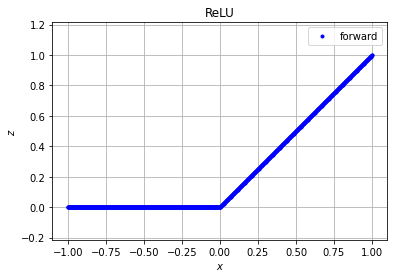

In [8]:
# set data
x_relu = np.linspace(-1,1,n_data)

# create instance of ReLU layer
relu_layer = ReLU()

# compute forward pass ReLU
forward_output_relu = relu_layer.forward(x_relu)

# visualize results
visualize_xy([(x_relu, forward_output_relu)], ['forward'], title='ReLU', axis='equal', xlabel='$x$', ylabel='$z$', linestyle='b.', grid=True, save_filepath='layer_relu_forward.png')

## Rectified Linear Unit (ReLU)
#### Backward

For the prepared params and data, output should be:<br>
```
Backward pass of your ReLU layer:
[0.   0.   0.   0.   0.   0.25 0.5  0.75 1.  ]
```

In [9]:
# set gradient of loss wrt layer output
n_data_bw = 9
dL_wrt_output_relu = np.linspace(-1,1,n_data_bw)

# set forward pass data and computation
x_relu = np.linspace(-1,1,n_data_bw)
_ = relu_layer.forward(x_relu)

# compute backward pass ReLU
dL_wrt_x_relu = relu_layer.backward(dL_wrt_output_relu)

print(f'Backward pass of your ReLU layer:\n{dL_wrt_x_relu}')

Backward pass of your ReLU layer:
[0.   0.   0.   0.   0.   0.25 0.5  0.75 1.  ]


## Sigmoid non-linearity
#### Forward

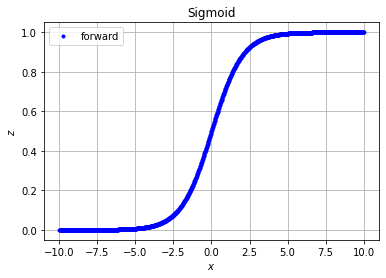

In [10]:
# set data
x_sigmoid = np.linspace(-10,10,1001)

# create instance of Sigmoid layer
sigmoid_layer = Sigmoid()

# compute forward pass sigmoid
forward_output_sigmoid = sigmoid_layer.forward(x_sigmoid)

# visualize results
visualize_xy([(x_sigmoid, forward_output_sigmoid)], ['forward'], title='Sigmoid', xlabel='$x$', ylabel='$z$', grid=True, linestyle='b.', save_filepath='layer_sigmoid_forward.png')

## Sigmoid non-linearity
#### Backward

For the prepared params and data, output should be:
```
Backward pass of your Sigmoid layer:
[-0.06648057 -0.35051858  0.          0.35051858  0.06648057]
```

In [11]:
# set gradient of loss wrt layer output
n_data_bw = 5
dL_wrt_output_sigmoid = np.linspace(-10,10,n_data_bw)

# set forward pass data and computation
x_sigmoid = np.linspace(-5,5,n_data_bw)
_ = sigmoid_layer.forward(x_sigmoid)

# compute backward pass ReLU
dL_wrt_x_sigmoid = sigmoid_layer.backward(dL_wrt_output_sigmoid)

print(f'Backward pass of your Sigmoid layer:\n{dL_wrt_x_sigmoid}')

Backward pass of your Sigmoid layer:
[-0.06648057 -0.35051858  0.          0.35051858  0.06648057]


## Squared Error Loss
#### Forward

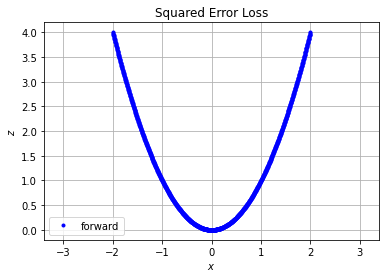

In [12]:
# set input data and ground truth data
x_se = np.linspace(-2,2,1001)
gt_se = 0 * x_se

# create instance of Squared Error Loss layer
se_layer = SE()

# compute SE loss
loss_se = se_layer.forward(x_se, gt_se)

# visualize results
visualize_xy([(x_se, loss_se)], ['forward'], title='Squared Error Loss', axis='equal', xlabel='$x$', ylabel='$z$', linestyle='b.', grid=True, save_filepath='layer_se_forward.png')

## Squared Error Loss
#### Backward

For the prepared params and data, output should be:
```
Backward pass of your Squared Error Loss layer:
[-5.   -3.75 -2.5  -1.25  0.    1.25  2.5   3.75  5.  ]
```

In [13]:
# set gradient of loss wrt layer output
n_data_bw = 9
dL_wrt_output_se = np.linspace(-10,10,n_data_bw)

# set forward pass data and computation
x_se = np.linspace(-5,5,n_data_bw)
_ = se_layer.forward(x_se, 0.5*x_se)

# compute backward pass ReLU
dL_wrt_x_se = se_layer.backward()

print(f'Backward pass of your Squared Error Loss layer:\n{dL_wrt_x_se}')

Backward pass of your Squared Error Loss layer:
[-5.   -3.75 -2.5  -1.25  0.    1.25  2.5   3.75  5.  ]


# B) Building Neural Network Model
### Set hyperparameters

Experiment with this setting as mentioned on the assignment CW page.

In [14]:
raise NotImplementedError("You have to set hyperparameters yourself.")
learning_rate = None
batch_size = None
N_epochs = 90
validation_set_fraction = 0.5



### load data - set which two MNIST digits you want to classify


In [15]:
class_a = 4
class_b = 9

(X_trn, y_trn), (X_tst, y_tst) = load_data('full-mnist.npz',
                                           class_a,
                                           class_b)

N_trn, D = X_trn.shape
assert D == 28*28
assert y_trn.shape == (N_trn, 1)

### Shuffle the dataset


In [16]:
trn_indices = np.arange(N_trn)
np.random.shuffle(trn_indices)
X_trn = X_trn[trn_indices, :]
y_trn = y_trn[trn_indices, :]

### Split into train/val


In [17]:
idx_split = int(np.round(N_trn * validation_set_fraction))

X_val = X_trn[:idx_split, :]
X_trn = X_trn[idx_split:, :]
N_trn = X_trn.shape[0]
N_val = X_val.shape[0]

y_val = y_trn[:idx_split, :]
y_trn = y_trn[idx_split:, :]

## Now, the magic happens - we build a model...

Experiment with model structure as mentioned on the assignment CW page.

In [18]:
raise NotImplementedError("Experiment with the model architecture.")
model = [Linear(D, 5), ReLU(), Linear(5, 1), Sigmoid()]
trn_head = SE()



## And train!

You do not need to modify this block of code. Read carefully for a better understanding.

In [19]:
print_each = 5 # loss printing setting - (you can modify this)


model_best_params = []
trn_losses = []
val_losses = []
best_val_loss_epoch = 0

batch_count = int(np.ceil(N_trn / batch_size))
for epoch in range(N_epochs):
    try:
        cumulative_epoch_trn_loss = 0 # just for reporting progress
        time_start = time.time()
        for batch_i in range(batch_count):
            # load the minibatch:
            batch_idx = range(batch_i * batch_size,
                              min(N_trn, (batch_i + 1) * batch_size))

            activation = X_trn[batch_idx]

            # forward pass:
            for layer in model:
                activation = layer.forward(activation)

            loss = trn_head.forward(activation, y_trn[batch_idx])
            trn_loss = loss.mean()

            cumulative_epoch_trn_loss += trn_loss

            # backward pass:
            grad_output = trn_head.backward()
            for layer in reversed(model):
                grad_output = layer.backward(grad_output)

            # Update the weights with gradient descent
            for layer in model:
                for param_name, param_value in layer.params().items():
                    param_value -= learning_rate * layer.grads()[param_name].mean(axis=0) # mean across the minibatch

        # validation
        activation = X_val.copy()
        for layer in model:
            activation = layer.forward(activation)
        val_losses.append(trn_head.forward(activation, y_val).mean())

        # remember the best model so far
        if len(val_losses) == 0 or val_losses[-1] < val_losses[best_val_loss_epoch]:
            best_val_loss_epoch = epoch
            model_best_params = [copy.deepcopy(layer.params()) for layer in model]

        trn_losses.append(cumulative_epoch_trn_loss / batch_count)
        if (epoch+1) % print_each == 0 or epoch == 0:
            print("[{:04d}/{:04d}][TRN] MSE loss {:2f} ({:.1f}s)".format(epoch+1, N_epochs, trn_losses[-1], time.time() - time_start))
            print("[{:04d}/{:04d}][VAL] MSE loss {:2f}".format(epoch+1, N_epochs, val_losses[-1]))
    except KeyboardInterrupt:
        print('Early exit')
        break

[0001/0030][TRN] MSE loss 0.035686 (2.0s)
[0001/0030][VAL] MSE loss 0.018059
[0005/0030][TRN] MSE loss 0.005182 (2.0s)
[0005/0030][VAL] MSE loss 0.009262
[0010/0030][TRN] MSE loss 0.001825 (2.0s)
[0010/0030][VAL] MSE loss 0.007901
[0015/0030][TRN] MSE loss 0.001272 (2.0s)
[0015/0030][VAL] MSE loss 0.007106
[0020/0030][TRN] MSE loss 0.001155 (2.1s)
[0020/0030][VAL] MSE loss 0.007099
[0025/0030][TRN] MSE loss 0.001054 (2.1s)
[0025/0030][VAL] MSE loss 0.006930
[0030/0030][TRN] MSE loss 0.001049 (2.6s)
[0030/0030][VAL] MSE loss 0.006994


### Plot epochs


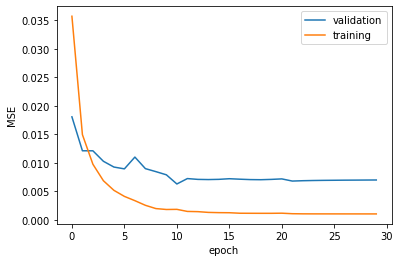

In [20]:
visualize_data([val_losses, trn_losses], legend=['validation', 'training'], xlabel='epoch', ylabel='MSE', save_filepath='numpy_nn_training.png')

### Load the best model and plot classification

Best VAL model loss 0.0063 at epoch #10.
[TST] MSE loss 0.0091
[TST] error 0.0126


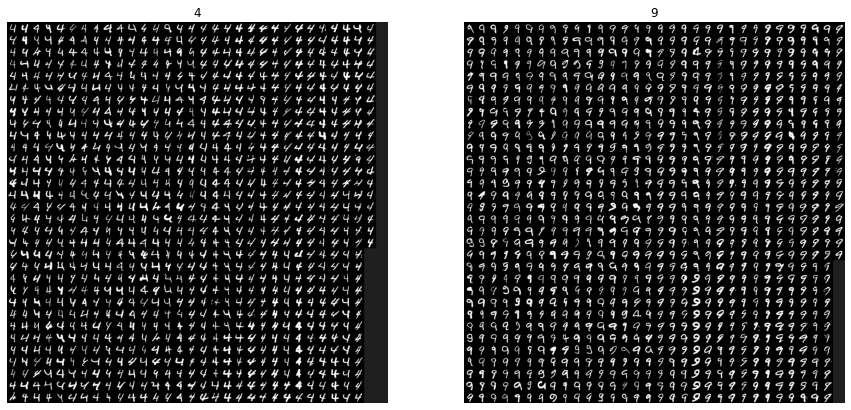

In [21]:
# TST load best model
print('Best VAL model loss {:.4f} at epoch #{:d}.'.format(val_losses[best_val_loss_epoch], best_val_loss_epoch))
for layer_id in range(len(model_best_params)):
    for key, value in model_best_params[layer_id].items():
        model[layer_id].params()[key] = value

# TST forward pass
activation = X_tst
for layer in model:
    activation = layer.forward(activation)
y_hat = (activation > 0.5).astype(int)

loss = trn_head.forward(activation, y_tst)
print("[TST] MSE loss {:.4f}".format(loss.mean()))

test_error = np.mean(y_hat != y_tst)
print("[TST] error {:.4f}".format(test_error))

plt.figure(figsize=(15, 10))
plt.title('NN classification: test error {:.4f}'.format(test_error))
show_classification(X_tst.transpose(1, 0).reshape(28, 28, -1), y_hat.squeeze(), '{}{}'.format(class_a,
                                                                                              class_b))
plt.savefig('numpy_nn_classification.png')
plt.show()